# <font color='red'><b>Bootstrap assignment</b> </font>

<b>There will be some functions that start with the word "grader" ex: grader_sampples(), grader_30().. etc, you should not change those function definition.

Every Grader function has to return True.</b>

<font color='blue'> <b>Importing packages</b> </font>

In [1]:
import numpy as np # importing numpy for numerical computation
from sklearn.datasets import load_boston # here we are using sklearn's boston dataset
from sklearn.metrics import mean_squared_error # importing mean_squared_error metric

In [2]:
boston = load_boston()
x=boston.data #independent variables
y=boston.target #target variable

In [3]:
x.shape

(506, 13)

In [4]:
x[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [5]:
y[0]

24.0

## <font color='red'><b>Task 1</b></font>

<font color='red'> <b>Step - 1</b></font>

*  <font color='blue'><b>Creating samples</b></font><br>
    <b> Randomly create 30 samples from the whole boston data points</b>
    *  Creating each sample: Consider any random 303(60% of 506) data points from whole data set and then replicate any 203 points from the sampled points
    
     For better understanding of this procedure lets check this examples, assume we have 10 data points [1,2,3,4,5,6,7,8,9,10], first we take 6 data points randomly , consider we have selected [4, 5, 7, 8, 9, 3] now we will replicate 4 points from [4, 5, 7, 8, 9, 3], consder they are [5, 8, 3,7] so our final sample will be [4, 5, 7, 8, 9, 3, 5, 8, 3,7]
* <font color='blue'><b> Create 30 samples </b></font>
    *  Note that as a part of the Bagging when you are taking the random samples <b>make sure each of the sample will have different set of columns</b><br>
Ex: Assume we have 10 columns[1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10] for the first sample we will select [3, 4, 5, 9, 1, 2] and for the second sample  [7, 9, 1, 4, 5, 6, 2] and so on...
Make sure each sample will have atleast 3 feautres/columns/attributes

<font color='red'><b>Step - 2 </b></font>

<font color='blue'><b>Building High Variance Models on each of the sample and finding train MSE value</b></font>

*  Build a regression trees on each of 30 samples.
*  Computed the predicted values of each data point(506 data points) in your corpus.
*  Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{30}\sum_{k=1}^{30}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$
*  Now calculate the $MSE =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$

<font color='red'> <b>Step - 3 </b></font>

*  <font color='blue'><b>Calculating the OOB score </b></font>

*  Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{k}\sum_{\text{k= model which was buit on samples not included } x^{i}}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$.
*  Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

# <font color='red'><b>Task 2</b></font>

*  <font color='blue'><b>Computing CI of OOB Score and Train MSE</b></font>
  *   Repeat Task 1 for 35 times, and for each iteration store the Train MSE and OOB score </li>
<li> After this we will have 35 Train MSE values and 35 OOB scores </li>
<li> using these 35 values (assume like a sample) find the confidence intravels of MSE and OOB Score </li>
<li> you need to report CI of MSE and CI of OOB Score </li>
<li> Note: Refer the Central_Limit_theorem.ipynb to check how to find the confidence intravel</li>
</ol>

# <font color='red'><b>Task 3</b></font>

*  <font color='blue'><b>Given a single query point predict the price of house.</b></font>

Consider xq= [0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60] 
Predict the house price for this point as mentioned in the step 2 of Task 1.

<br><br><br>

# <font color='blue'> <b>Task - 1</b></font>

<font color='blue'><b>Step - 1</b></font>

*  <font color='blue'> <b>Creating samples</b></font>

<font color='Orange'><b>Algorithm</b></font>

![alt text](https://i.imgur.com/BTVYXQ1.jpg/)

*  <font color='blue'><b> Write code for generating samples</b></font>

In [6]:
def generating_samples(input_data, target_data):

    '''In this function, we will write code for generating 30 samples '''
    # you can use random.choice to generate random indices without replacement
    # Please have a look at this link https://docs.scipy.org/doc/numpy-1.16.0/reference/generated/numpy.random.choice.html for more details
    # Please follow above pseudo code for generating samples 
    
    Selecting_rows = np.random.choice(np.array(range(len(input_data))), 303, replace=False)
    Replacing_rows = np.random.choice(np.array(range(len(Selecting_rows))), 203, replace=False)
    Selecting_cols = np.random.choice(np.array(range(3,13)), np.random.randint(3,11), replace=False)
    
    sample_data = input_data[Selecting_rows[:,None], Selecting_cols]
    
    target_of_sample_data = target_data[Selecting_rows]
    
    # Replicating Data
    Replicated_sample_data = sample_data[Replacing_rows]
    target_of_Replicated_sample_data = target_data[Replacing_rows]
    
    # Concatenating data
    final_sample_data = np.vstack((sample_data, Replicated_sample_data))
    final_target_data = np.vstack((target_of_sample_data.reshape(-1,1), target_of_Replicated_sample_data.reshape(-1,1)))
    
    
    return list(final_sample_data), list(final_target_data), list(Selecting_rows), list(Selecting_cols)
    #note please return as lists

<font color='cyan'> <b> Grader function - 1 </b> </fongt>

In [7]:
def grader_samples(a,b,c,d):
    length = (len(a)==506  and len(b)==506)
    sampled = (len(a)-len(set([str(i) for i in a]))==203)
    rows_length = (len(c)==303)
    column_length= (len(d)>=3)
    assert(length and sampled and rows_length and column_length)
    return True
a,b,c,d = generating_samples(x, y)
grader_samples(a,b,c,d)

True

*  <font color='blue'> <b>Create 30 samples </b>

![alt text](https://i.imgur.com/p8eZaWL.jpg)

In [8]:
# Use generating_samples function to create 30 samples 
# store these created samples in a list
list_input_data =[]
list_output_data =[]
list_selected_row= []
list_selected_columns=[]

for i in range(30):
    a,b,c,d = generating_samples(x,y)
    list_input_data.append(a)
    list_output_data.append(b)
    list_selected_row.append(c)
    list_selected_columns.append(d)

<font color='cyan'> <b>Grader function - 2 </b></font>

In [9]:
def grader_30(a):
    assert(len(a)==30 and len(a[0])==506)
    return True
grader_30(list_input_data)

True

<br>

<font color='red'><b>Step - 2 </b></font>

<font color='orange'><b>Flowchart for building tree</b></font>

![alt text](https://i.imgur.com/pcXfSmp.png)

*  <font color='blue'><b> Write code for building regression trees</b></font>

In [10]:
len(list_input_data[0])

506

In [11]:
len(list_output_data[0])

506

In [12]:
from sklearn.tree import DecisionTreeRegressor
list_of_all_models = []

for i in range(30):
    regressor = DecisionTreeRegressor(max_depth=None)
    regressor.fit(list_input_data[i], list_output_data[i])
    list_of_all_models.append(regressor)

In [13]:
len(list_of_all_models)

30

<font color='orange'><b>Flowchart for calculating MSE </b></font>

![alt text](https://i.imgur.com/sPEE618.png)

After getting predicted_y for each data point, we can use sklearns mean_squared_error to calculate the MSE between predicted_y and actual_y.

*  <font color='blue'><b> Write code for calculating MSE</b></font>

In [14]:
import statistics as stats

In [15]:
y_hat = [] # for all data points
for i in range(len(x)):
    array_of_Y = []
    for j in range(30):
        model = list_of_all_models[j]
        y_predicted = model.predict(x[i][list_selected_columns[j]].reshape(1,-1))
        array_of_Y.append(y_predicted)
    y_hat.append(stats.median(array_of_Y))
    
y_hat = np.array(y_hat).reshape(-1,1)

In [16]:
len(y_hat)

506

In [17]:
MSE = 0
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y, y_hat)
MSE

13.964854935221782

<font color='blue'><b>Step - 3 </b></font>

<font color='orange'><b>Flowchart for calculating OOB score</b></font>

![alt text](https://i.imgur.com/95S5Mtm.png)

Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

*  <font color='blue'><b> Write code for calculating OOB score </b></font>

In [18]:
from tqdm import tqdm # to visualize the processing 

In [19]:
Y_pred = [] # to st`ore the predicted value for each datapoint 
for i in tqdm(range(len(x))): # for each datapoints in train data
    
    
    list_of_Y_values = [] # list to store the predicted value of single datapoint from all different
                          # models which wasn't trained including this perticular datapoint
    count=0
    for j in range(len(list_of_all_models)):# for each model
        sample = list_input_data[j] # ith sampled data
        model  = list_of_all_models[j] # ith model
        
        
        # it took me more than an hour...
        
        if not any((x[i][list_selected_columns[j]]==t).all() for t in sample): # check, if datapoint not in sample
            count+=1
            datapoint = x[i][list_selected_columns[j]] # datapoint
            y_pred = model.predict(datapoint.reshape(1,-1)) # predict 
            list_of_Y_values.append(y_pred) # store the prediction
    
#     print(count) # uncomment this to track
    Y_pred.append(np.median(list_of_Y_values))

100%|████████████████████████████████████████████████████████████████████████████████| 506/506 [02:03<00:00,  4.09it/s]


In [20]:
len(Y_pred)

506

In [21]:
y.shape

(506,)

In [22]:
y_pred = np.array(Y_pred).reshape(-1,1)

In [23]:
y_pred.shape

(506, 1)

In [24]:
y = y.reshape(-1,1)

In [25]:
y.shape

(506, 1)

In [26]:
# oobscore = 0
# for i in range(len(x)):
#     oobscore += (y[i] - y_pred[i])**2
    
# oobscore /= len(x)

oobscore = mean_squared_error(y , y_pred)

In [27]:
oobscore

24.69395202020202

# <font color='blue'><b>Task 2</b></font>

*  <font color='blue'><b>Computing CI of OOB Score and Train MSE</b></font>
  *   Repeat Task 1 for 35 times, and for each iteration store the Train MSE and OOB score </li>
<li> After this we will have 35 Train MSE values and 35 OOB scores </li>
<li> using these 35 values (assume like a sample) find the confidence intravels of MSE and OOB Score </li>
<li> you need to report CI of MSE and CI of OOB Score </li>
<li> Note: Refer the Central_Limit_theorem.ipynb to check how to find the confidence intravel</li>
</ol>

In [28]:
train_mse_ci = [] # to store train scores for each iteration
oobscore_ci = [] # to store oobscore scores for each iteration

for k in tqdm(range(35)):
    
    # Use generating_samples function to create 30 samples 
    # store these created samples in a list
    list_input_data =[]
    list_output_data =[]
    list_selected_row= []
    list_selected_columns=[]

    for i in range(30):
        a,b,c,d = generating_samples(x,y)
        list_input_data.append(a)
        list_output_data.append(b)
        list_selected_row.append(c)
        list_selected_columns.append(d)
    
    ##########################################################
    ###### MODELING ##########################################
    ##########################################################
    from sklearn.tree import DecisionTreeRegressor
    list_of_all_models = []

    for i in range(30):
        regressor = DecisionTreeRegressor(max_depth=None)
        regressor.fit(list_input_data[i], list_output_data[i])
        list_of_all_models.append(regressor)
    ##########################################################
    
    ##########################################################
    #### CALCULATING MSE AND OOBSCORE #####################################
    y_hat = [] # for all data points
    for i in range(len(x)):
        array_of_Y = []
        for j in range(30):
            model = list_of_all_models[j]
            y_predicted = model.predict(x[i][list_selected_columns[j]].reshape(1,-1))
            array_of_Y.append(y_predicted)
        y_hat.append(stats.median(array_of_Y))

    y_hat = np.array(y_hat).reshape(-1,1)
    
    MSE = 0
    MSE = mean_squared_error(y, y_hat)
    
    ###### Calculating OOBScore ###################################
    Y_pred = [] # to st`ore the predicted value for each datapoint 
    for i in range(len(x)): # for each datapoints in train data


        list_of_Y_values = [] # list to store the predicted value of single datapoint from all different
                              # models which wasn't trained including this perticular datapoint
        count=0
        for j in range(len(list_of_all_models)):# for each model
            sample = list_input_data[j] # ith sampled data
            model  = list_of_all_models[j] # ith model


            # it took me more than an hour...

            if not any((x[i][list_selected_columns[j]]==t).all() for t in sample): # check, if datapoint non in sample
                count+=1
                datapoint = x[i][list_selected_columns[j]] # datapoint
                y_pred = model.predict(datapoint.reshape(1,-1)) # predict 
                list_of_Y_values.append(y_pred) # store the prediction

        Y_pred.append(np.median(list_of_Y_values))
        y_pred = np.array(Y_pred).reshape(-1,1)
    y = y.reshape(-1,1)
    oobscore = mean_squared_error(y , y_pred)
    
    #appending MSE and oobscore
    train_mse_ci.append(MSE)
    oobscore_ci.append(oobscore)

100%|███████████████████████████████████████████████████████████████████████████████| 35/35 [1:09:45<00:00, 119.58s/it]


In [29]:
len(train_mse_ci)

35

In [30]:
len(oobscore_ci)

35

In [31]:
train_mse_ci

[14.077728626915965,
 14.241258064996899,
 14.602775642902454,
 14.12674493851559,
 14.094529372025491,
 15.651075823847378,
 15.2155556418679,
 14.725736714975847,
 13.43109861532465,
 13.209862929567413,
 14.71104310770751,
 14.424436442050673,
 12.969498594985177,
 13.549703117248583,
 13.41694972826087,
 12.575912670208071,
 15.099948122529645,
 12.327934713987704,
 15.392370927766574,
 13.08452150581906,
 14.763274582784364,
 14.70808437637242,
 14.886042254668792,
 15.041958647898515,
 13.988198184288535,
 13.378420669689335,
 13.317411070582367,
 13.955985157279313,
 14.98591286276361,
 14.038023337999558,
 14.368765362699758,
 13.419134182861221,
 14.222570188734506,
 14.735060952083378,
 13.971089444809955]

In [32]:
oobscore_ci

[27.280357927097057,
 24.3679218818621,
 27.73140347084981,
 27.535234683794467,
 26.76888741353755,
 27.174696549568445,
 26.375550203118138,
 24.172465415019765,
 25.800654541337288,
 27.126321640316206,
 27.707547074000882,
 25.01606225296443,
 22.54284584980237,
 27.612256669960473,
 26.49898097826087,
 23.395737104743084,
 27.611316425120773,
 23.657449357707513,
 27.136519817742645,
 26.815434782608694,
 25.438436539306103,
 29.230241477272724,
 24.234595377689942,
 27.87745923913043,
 28.99698795015371,
 25.837791023029762,
 24.29808067083882,
 25.224919713438734,
 27.233121191534913,
 28.643684535573126,
 29.1711351284585,
 25.861175889328067,
 23.978799306283776,
 27.399975093380565,
 27.773785820158103]

In [33]:
# finding the C.I of MSE and OOBScore


In [34]:
import seaborn as sns

In [35]:
import matplotlib.pyplot as plt

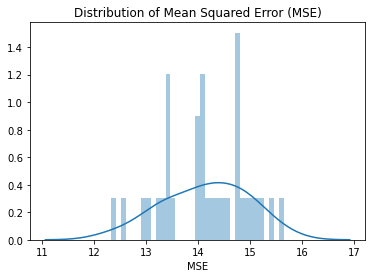

In [36]:
sns.distplot(train_mse_ci,bins=35)
plt.title("Distribution of Mean Squared Error (MSE)")
plt.xlabel('MSE')
plt.show()


Text(0.5, 0, 'OOBScore')

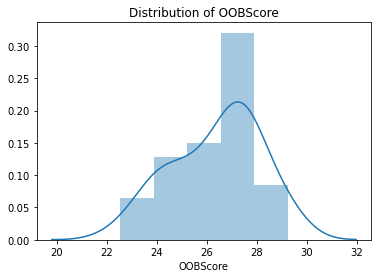

In [37]:
sns.distplot(oobscore_ci)
plt.title("Distribution of OOBScore")
plt.xlabel("OOBScore")

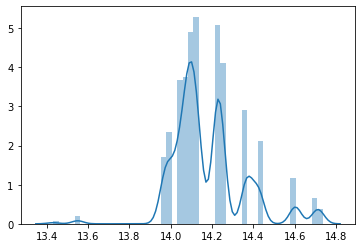

90.0 confidence interval 14.0 and 14.6


(13.971089444809955, 14.602775642902454)

In [38]:
# confindence interval for MSE

def confidence_interval(data, confidence_value=0.95, n_iter=1000):
    '''this function returns Confidence Interval of given
        data and given confidence_value(default=0.95)'''
    
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.utils import resample

    # fix the randomization
    np.random.seed(42)
    # confidence bootstrap
    n_iterations = n_iter
    n_size=len(data)

    medians = []

    for i in range(n_iterations):
        # creating samples using list MSE scores 
        s = resample(data, n_samples=n_size)
        m = np.median(s)

        medians.append(m)

    # plot scores
    sns.distplot(medians)
    plt.show() # enforce to show plot first

    # confidence intervals (95)
    alpha = confidence_value # override it and find any confidence intervals

    p = ((1.0-alpha)/2.0) * 100
    lower =  np.percentile(medians, p)

    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper =  np.percentile(medians, p)

    print('%.1f confidence interval %.1f and %.1f' % (alpha*100, lower, upper))
    return (lower, upper)

confidence_interval(train_mse_ci, 0.90,2000)

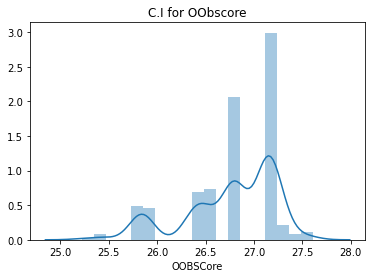

95.0 confidence interval 25.8 and 27.3


(25.800654541337288, 27.280357927097057)

In [39]:
# C.I for OOBscore
plt.title('C.I for OObscore')
plt.xlabel('OOBSCore')
confidence_interval(oobscore_ci,0.95, 1000)

# <font color='blue'><b>Task 3</b></font>

<font color='orange'><b>Flowchart for Task 3</b></font>

<b>Hint: </b> We created 30 models by using 30 samples in TASK-1. Here, we need send query point "xq"  to 30 models and perform the regression on the output generated by 30 models.

![alt text](https://i.imgur.com/Y5cNhQk.png)

*  <font color='blue'><b> Write code for TASK 3 </b></font>

In [47]:
xq = [0.18, 20.0, 5.0, 0.0, 0.421, 5.60, 72.2, 7.95, 7.0, 30.0, 19.1, 372.13, 18.60]
len(xq)

13

In [48]:

def find_prediction(datapoint, models):
    from tqdm import tqdm
    
    list_of_all_models = models
    yq_hat = []
    
    for i in tqdm(range(len(list_of_all_models))):
        xq = np.array(datapoint).reshape(1,-1)
        xq = xq[:,list_selected_columns[i]]
        
        model = list_of_all_models[i]

        y_predicted = model.predict(xq.reshape(1,-1))
        yq_hat.append(y_predicted)

    return np.median(yq_hat)

In [49]:
y_hat = find_prediction(xq, list_of_all_models)

100%|████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 6003.01it/s]


In [50]:
y_hat

21.775

<br><br><br>

<font color='red'><b>Write observations for task 1, task 2, task 3 indetail</b></font>

### Observations:
    In all three Task, I understand the internal details that how everything is working internally of Bagging model(Random Forest).
    